<a href="https://colab.research.google.com/github/neethusunil/iris-classifier/blob/main/Iris_Flower_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
#importing dataset
iris = pd.read_csv("/content/IRIS.csv")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
#preprocessing
#spli tour datasets into its attributes and labels
X = iris.iloc[:, :-1].values
y = iris.iloc[:, 4].values


In [16]:
#split datasets
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state = 44)

In [17]:
#feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


In [26]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=15)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [27]:
y_pred = classifier.predict(x_test)

In [28]:
y_pred

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [33]:
x_test

array([[ 1.09056908,  0.52093649,  1.14394405,  1.71929575],
       [-1.15716871,  0.06794824, -1.26838984, -1.4265567 ],
       [-0.15817414, -1.0645224 , -0.11965942, -0.24686203],
       [-0.15817414, -0.15854589,  0.28239623,  0.01529234],
       [ 0.84082043, -0.15854589,  1.20138057,  1.32606419],
       [-1.53179168,  0.29444237, -1.32582636, -1.29547952],
       [ 2.33931229, -1.0645224 ,  1.8331823 ,  1.45714138],
       [ 1.83981501, -0.38504002,  1.48856317,  0.80175545],
       [ 1.59006636, -0.15854589,  1.25881709,  1.19498701],
       [-0.40792278, -1.0645224 ,  0.39726927,  0.01529234],
       [-0.90742007,  0.97392475, -1.32582636, -1.16440233],
       [ 1.34031772,  0.06794824,  0.68445188,  0.40852389],
       [-0.90742007,  1.65340713, -1.21095332, -1.29547952],
       [-0.03329982, -0.83802827,  0.79932492,  0.93283264],
       [-0.78254575,  0.74743062, -1.32582636, -1.29547952],
       [-1.53179168,  0.06794824, -1.26838984, -1.29547952],
       [ 2.21443797, -0.

In [29]:
y_test

array(['Iris-virginica', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [30]:
#Evaluating the algorithm
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[ 9  0  0]
 [ 0  9  0]
 [ 0  1 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         9
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [31]:
#comparing error rate with the k value

error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

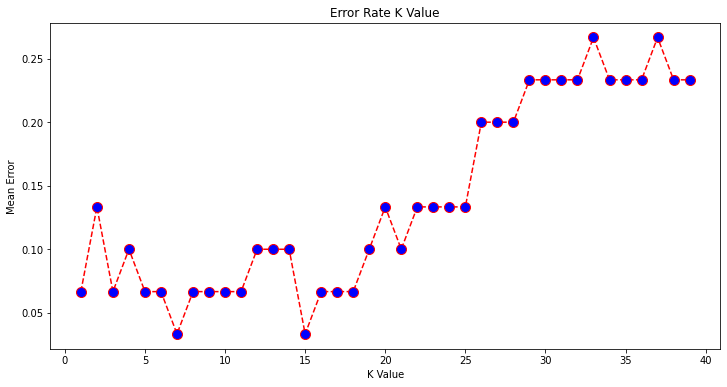

In [32]:
#The above script executes a loop from 1 to 40. In each iteration the mean error for predicted values of test set is calculated and the result is appended to the error list.
#The next step is to plot the error values against K values. Execute the following script to create the plot:

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [44]:
#prediction of iris
new_data =np.array([-1.656666  , -1.74400478, -1.38326288, -1.16440233]).reshape(-1,4)
new_data

array([[-1.656666  , -1.74400478, -1.38326288, -1.16440233]])

In [45]:
classifier.predict(new_data)

array(['Iris-setosa'], dtype=object)